# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import datetime

# Import API key
# from api_keys import api_key
api_key="286e7d3df35b5295f1f15533b029ab29"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))
print(cities[0])

629
dolbeau


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query_url = url + "appid=" + api_key + "&q=" + city
# query_url = url + "appid=" + api_key&units={units} + "&q="
query_url = f"{url}appid={api_key}&units={units}&q="

name = []
latitude =[]
longitude=[]
temp=[]
humidity=[]
cloudiness=[]
windspeed=[]
date=[]
country=[]

citynum=0

print('Beginning Data Retrieval')
print('---------------------------')
for city in cities:
    response = requests.get(query_url + city).json()
#     time.sleep(1)
#     print(response)
    try: 
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        windspeed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        name.append(city)
    except KeyError:
        print("null")
    
    citynum=citynum+1
    print(f'Processing Record {citynum} | {city}')

print('---------------------------')
print('Data Retrieval Complete')
print('---------------------------')
        
        
        


Beginning Data Retrieval
---------------------------
null
Processing Record 1 | dolbeau
Processing Record 2 | castro
Processing Record 3 | coihaique
Processing Record 4 | la ronge
Processing Record 5 | punta arenas
Processing Record 6 | mataura
Processing Record 7 | paamiut
Processing Record 8 | jamestown
null
Processing Record 9 | illoqqortoormiut
Processing Record 10 | seymchan
Processing Record 11 | rincon
Processing Record 12 | stabat
Processing Record 13 | luderitz
Processing Record 14 | khipro
Processing Record 15 | canchungo
Processing Record 16 | east london
Processing Record 17 | busselton
Processing Record 18 | tiksi
Processing Record 19 | bluff
Processing Record 20 | suicheng
Processing Record 21 | coahuayana
Processing Record 22 | kieta
Processing Record 23 | ihosy
null
Processing Record 24 | odweyne
Processing Record 25 | campbell river
Processing Record 26 | rikitea
Processing Record 27 | nandgaon
Processing Record 28 | flinders
Processing Record 29 | atuona
Processing Re

Processing Record 245 | villa alemana
Processing Record 246 | chuy
null
Processing Record 247 | samusu
Processing Record 248 | funadhoo
null
Processing Record 249 | sakakah
Processing Record 250 | lazaro cardenas
Processing Record 251 | tessalit
Processing Record 252 | margate
Processing Record 253 | quarai
null
Processing Record 254 | el faiyum
Processing Record 255 | havelock
null
Processing Record 256 | grand river south east
Processing Record 257 | arkhara
Processing Record 258 | georgetown
Processing Record 259 | gold coast
Processing Record 260 | fort-shevchenko
Processing Record 261 | najran
Processing Record 262 | wanaka
Processing Record 263 | muisne
Processing Record 264 | wesel
Processing Record 265 | kungurtug
Processing Record 266 | turukhansk
Processing Record 267 | vila velha
Processing Record 268 | carutapera
Processing Record 269 | lagoa
Processing Record 270 | santa fe
Processing Record 271 | knysna
Processing Record 272 | samut prakan
Processing Record 273 | xuanhua


Processing Record 486 | shenzhen
Processing Record 487 | zeya
Processing Record 488 | broken hill
null
Processing Record 489 | cumaribo
Processing Record 490 | laguna
Processing Record 491 | mehamn
Processing Record 492 | aykhal
Processing Record 493 | rio cuarto
Processing Record 494 | grobina
Processing Record 495 | sidney
Processing Record 496 | sassandra
null
Processing Record 497 | galgani
Processing Record 498 | bagdarin
Processing Record 499 | opuwo
Processing Record 500 | bereda
Processing Record 501 | sao filipe
Processing Record 502 | cordoba
Processing Record 503 | grand forks
Processing Record 504 | thiene
Processing Record 505 | ulsteinvik
Processing Record 506 | bialystok
null
Processing Record 507 | saleaula
Processing Record 508 | sisimiut
Processing Record 509 | deputatskiy
Processing Record 510 | feijo
Processing Record 511 | pihani
Processing Record 512 | emerald
Processing Record 513 | cheremshan
Processing Record 514 | foumbot
Processing Record 515 | batticaloa
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
cities_df=pd.DataFrame({
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Longitude": longitude,
    "Latitude": latitude,
    "Max Temp": temp,
    "Wind Speed": windspeed,
})

cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Longitude,Latitude,Max Temp,Wind Speed
0,castro,75,CL,1566674123,93,-73.76,-42.48,50.00,11.41
1,coihaique,90,CL,1566674123,87,-72.07,-45.58,42.80,8.05
2,la ronge,90,CA,1566674092,88,-105.30,55.10,62.60,2.51
3,punta arenas,75,CL,1566673891,81,-70.91,-53.16,46.00,8.05
4,mataura,77,NZ,1566673881,88,168.86,-46.19,42.01,1.99


In [14]:
cities_df.count()

City          566
Cloudiness    566
Country       566
Date          566
Humidity      566
Longitude     566
Latitude      566
Max Temp      566
Wind Speed    566
dtype: int64

In [19]:
cities_df.to_csv("cityweather.csv", encoding="utf-8", index=False, header=True)



### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

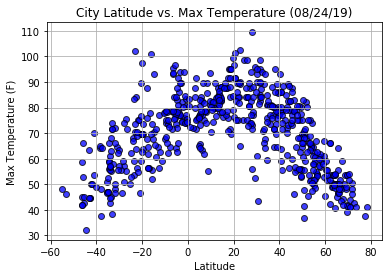

In [29]:
x_limit = 85
x_axis = np.arange(-60, x_limit, 20)

y_limit = 115
y_axis = np.arange(20, y_limit, 10)



plt.figure()
plt.scatter(latitude, temp, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Max Temperature (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")


plt.grid()

plt.savefig("../Images/latVStemp.png")
plt.show()

#### Latitude vs. Humidity Plot

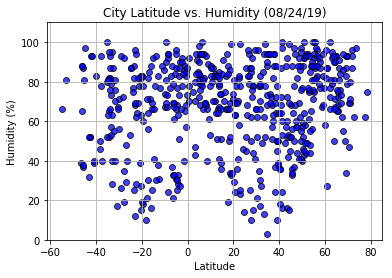

In [30]:
x_limit = 85
x_axis = np.arange(-60, x_limit, 20)

y_limit = 120
y_axis = np.arange(0, y_limit, 20)



plt.figure()
plt.scatter(latitude, humidity, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Humidity (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")


plt.grid()
plt.ylim(0, 110)
plt.savefig("../Images/latVShumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

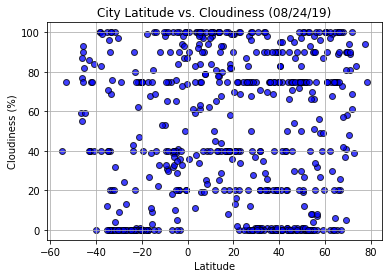

In [31]:
x_limit = 85
x_axis = np.arange(-60, x_limit, 20)

y_limit = 120
y_axis = np.arange(0, y_limit, 20)



plt.figure()
plt.scatter(latitude, cloudiness, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Cloudiness (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


plt.grid()

plt.savefig("../Images/latVScloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

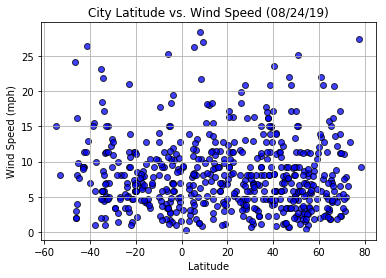

In [32]:
x_limit = 85
x_axis = np.arange(-60, x_limit, 20)

y_limit = 35
y_axis = np.arange(0, y_limit, 5)



plt.figure()
plt.scatter(latitude, windspeed, marker="o", facecolors="blue", edgecolors="black", alpha=0.75)

plt.title("City Latitude vs. Wind Speed (08/24/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")


plt.grid()

plt.savefig("../Images/latVSwindspeed.png")
plt.show()

In [ ]:
# Three Observable Trends:
    

#1) Today's max temperature was overall highest for cities closest to the equator.

#2) There is no discernible correlation of the sample cities with today's humidity and cloudiness to the equator.

#3) 4 of the top 7 windiest cities today were close to the equator.